In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# Loaded RFM data with cluster assignments.
rfm = pd.read_csv("../outputs/rfm_with_clusters.csv")

rfm.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Cluster
0,12346,326,12,77556.46,2,3,4,9,1
1,12347,2,8,5633.32,4,3,4,11,1
2,12348,75,5,2019.40,3,2,3,8,1
3,12349,19,4,4428.69,4,2,4,10,1
4,12350,310,1,334.40,2,1,1,4,0


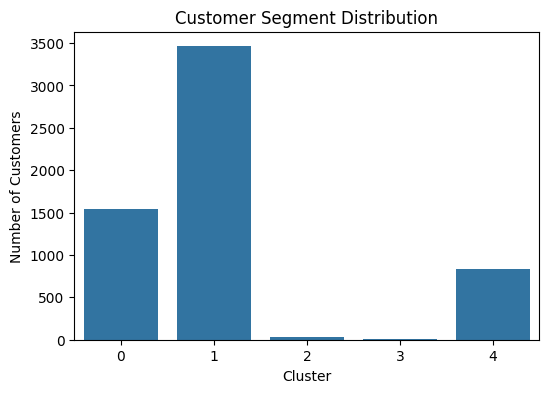

In [20]:
# Visualized customer distribution across segments.
plt.figure(figsize=(6,4))
sns.countplot(x="Cluster", data=rfm)
plt.title("Customer Segment Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()


In [21]:
# Computed average RFM metrics per cluster.
cluster_profile = (
    rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .round(2)
)

cluster_profile


,Recency,Frequency,Monetary
Cluster,,,
0,334.18,2.68,900.97
1,50.42,7.78,3225.42
2,25.94,103.71,83086.08
3,3.50,212.50,436835.79
4,590.58,1.71,639.43


In [22]:
# Calculated revenue contribution per cluster.
cluster_revenue = (
    rfm.groupby("Cluster")["Monetary"]
    .sum()
    .sort_values(ascending=False)
)

cluster_revenue


Cluster
1    1.116316e+07
2    2.908013e+06
3    1.747343e+06
0    1.392903e+06
4    5.320064e+05
Name: Monetary, dtype: float64

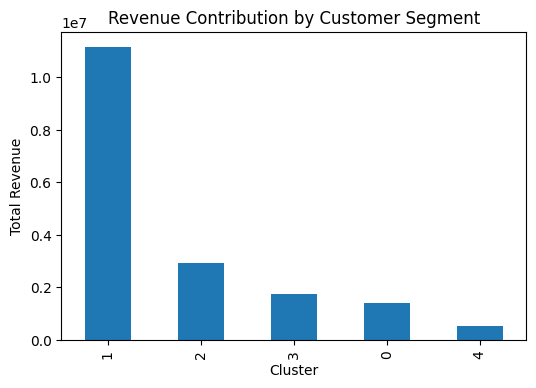

In [23]:
# Visualized revenue share by cluster.
plt.figure(figsize=(6,4))
cluster_revenue.plot(kind="bar")
plt.title("Revenue Contribution by Customer Segment")
plt.xlabel("Cluster")
plt.ylabel("Total Revenue")
plt.show()


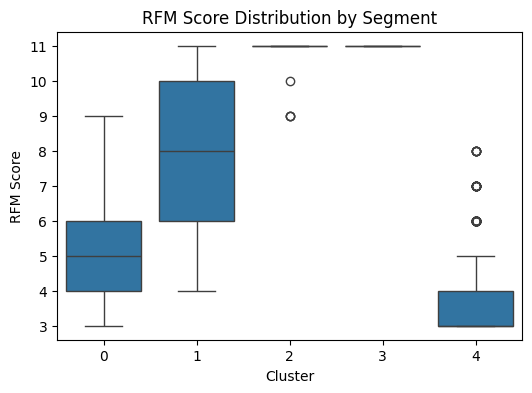

In [24]:
# Evaluated RFM score distribution across clusters.
plt.figure(figsize=(6,4))
sns.boxplot(x="Cluster", y="RFM_Score", data=rfm)
plt.title("RFM Score Distribution by Segment")
plt.xlabel("Cluster")
plt.ylabel("RFM Score")
plt.show()
